In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime

Importing the data frame - extracted from  Arce, A. N., David, T. I., Randall, E. L., Ramos Rodrigues, A., Colgan, T. J., Wurm, Y., & Gill, R. J. (2017). Impact of controlled neonicotinoid exposure on bumblebees in a realistic field setting. Journal of Applied Ecology, 54(4), 1199-1208

In [2]:
bees_complete = pd.read_csv("Arce.et.al_census.csv")
bees_complete.head()

,obs,treatment,colony,workers_st,pupae_st,size,b_wt_st,pair,eggs,b_wt_end,...,workers_wt,males,males_wt,av_male,gyne,gynes_wt,av_gyne,weight_increase,sum_larval_no,sum_larval_weight
0,pollen removal,c,01B_C,51,50,8,44.57,1,192,154.69,...,30.090,19,5.925,0.311842,2,1.506,0.753000,110.12,235,28.043
1,pollen removal,c,03G_C,36,54,3,38.60,2,103,151.37,...,10.118,2,0.576,0.288000,18,15.005,0.833611,112.77,111,14.047
2,pollen removal,c,05R_C,36,38,1,51.04,3,10,104.36,...,3.360,1,0.242,0.242000,0,0.000,NaN,53.32,7,0.922
3,pollen removal,c,07P_C,39,37,2,28.52,4,99,84.50,...,5.249,34,9.608,0.282588,0,0.000,NaN,55.98,58,2.923
4,pollen removal,c,09Y_C,58,64,10,57.10,5,262,191.07,...,14.435,14,4.656,0.332571,20,16.113,0.805650,133.97,50,9.049


Drop the columns 'obs', 'treatment','colony', 'size','b_wt_st', 'pair','b_wt_end', 'pupae_wt', 'queen_wt', 'workers_wt', 'males_wt', 'av_male', 'av_gyne', 'gynes_wt', 'sum_larval_weight' to explore the response variables of interest in the data set

In [4]:
bees = bees_complete.drop(columns=['obs', 'treatment','colony','size','b_wt_st','pair','b_wt_end','pupae_wt','queen_wt','workers_wt','males_wt','av_male','av_gyne','gynes_wt','sum_larval_weight'])
bees

,workers_st,pupae_st,eggs,pupae,queen,workers,males,gyne,weight_increase,sum_larval_no
0,51,50,192,135,1,121,19,2,110.12,235
1,36,54,103,65,1,56,2,18,112.77,111
2,36,38,10,38,0,16,1,0,53.32,7
3,39,37,99,89,0,34,34,0,55.98,58
4,58,64,262,140,1,76,14,20,133.97,50
5,48,55,191,198,1,115,2,14,102.70,345
6,37,50,239,103,0,58,22,2,58.62,80
7,35,36,0,39,0,23,0,5,15.59,41
8,40,47,86,154,1,91,56,8,148.51,159
9,51,99,336,224,0,78,7,0,110.27,115


Brief explanation of the variables of interest: they represent the census of the colonies. 'workers_st' and 'pupae_st' are the data about these individuals at the beginning of the experiment, before the treatment or control weeks. The variables 'eggs,' 'pupae,' 'queen,' 'workers,' 'males,' 'gyne,' 'weight_increase,' and 'sum_larval_no' were collected after the 5 weeks of treatment/control. Each variable represents a group of bees within the colonies, and 'weight_increase' is the difference in the weight of the colonies at the start and in the end of the treatment

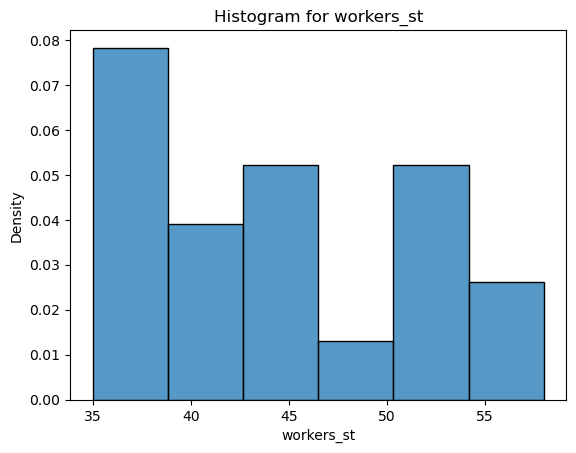

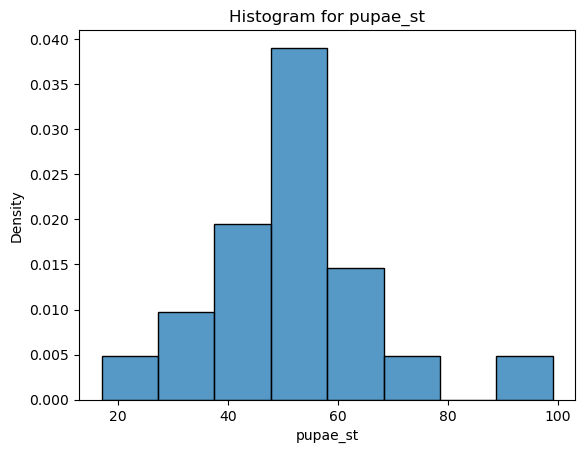

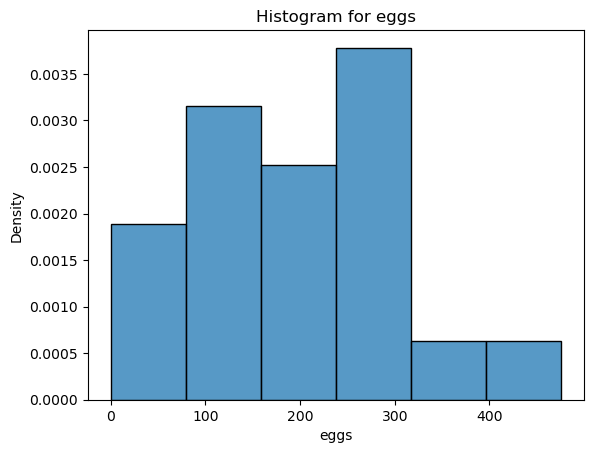

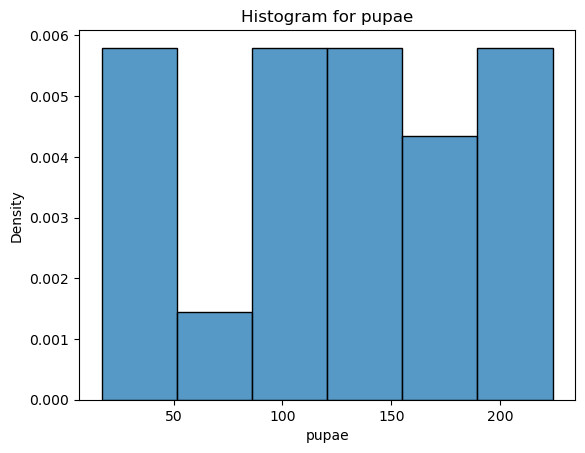

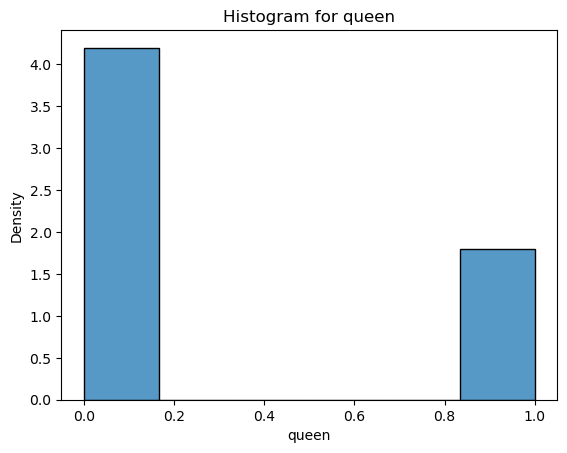

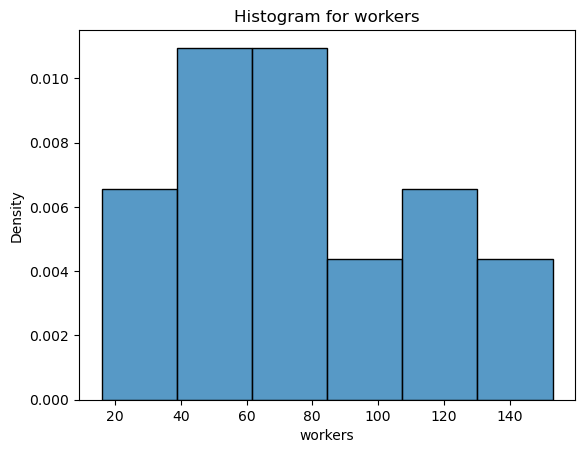

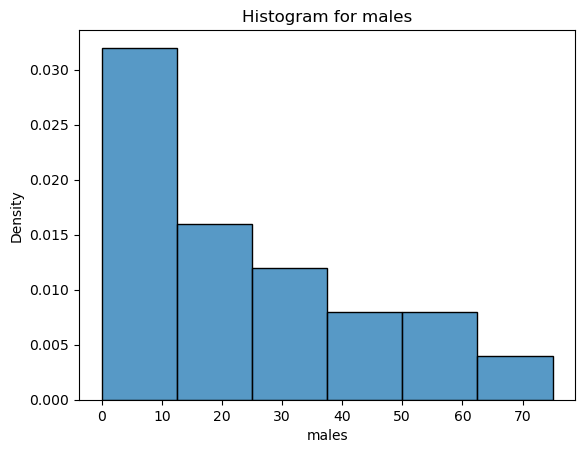

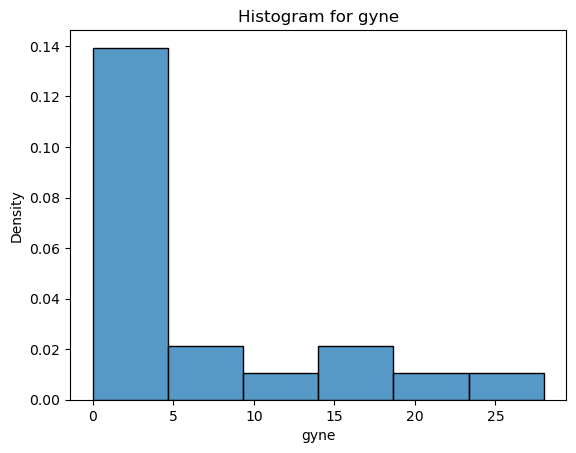

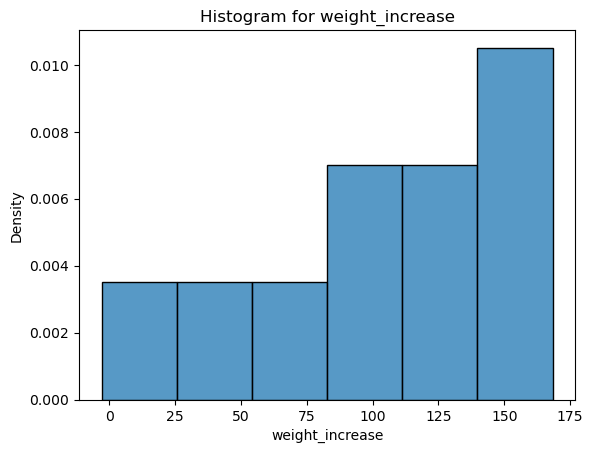

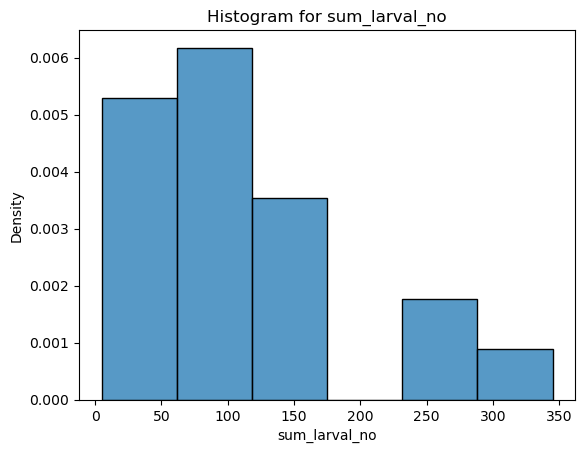

In [5]:
#Loop to generate the histogram for each item in the bees data frame
for i, col in enumerate(bees.columns):
    plt.figure(i)
    sns.histplot(bees[col], stat='density')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.show()

Plotting the census of colonies using boxplots to visualize the data in the control and treatment groups for the response variables of interest

<Axes: xlabel='treatment', ylabel='gyne'>

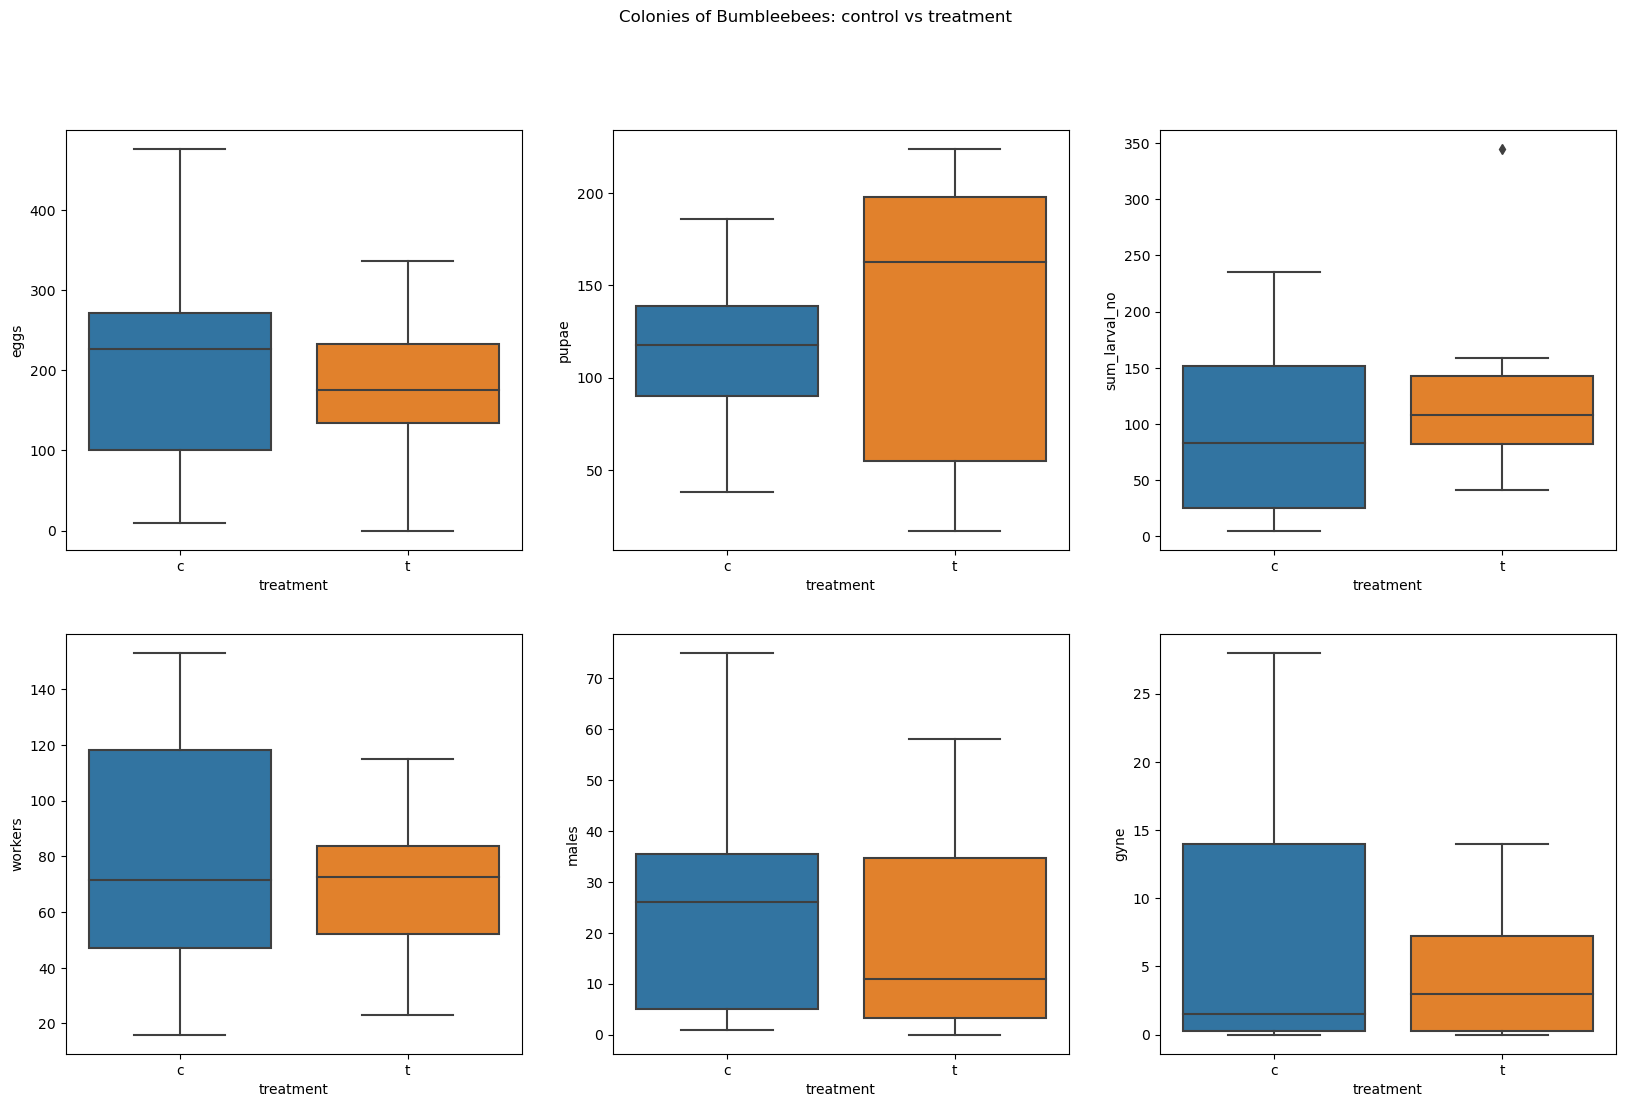

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
 
fig.suptitle('Colonies of Bumbleebees: control vs treatment')

sns.boxplot(ax=axes[0, 0], data=bees_complete, x='treatment', y='eggs')
sns.boxplot(ax=axes[0, 1], data=bees_complete, x='treatment', y='pupae')
sns.boxplot(ax=axes[0, 2], data=bees_complete, x='treatment', y='sum_larval_no')
sns.boxplot(ax=axes[1, 0], data=bees_complete, x='treatment', y='workers')
sns.boxplot(ax=axes[1, 1], data=bees_complete, x='treatment', y='males')
sns.boxplot(ax=axes[1, 2], data=bees_complete, x='treatment', y='gyne')

Visualizing my data frame to add the treatment and colony columns that will be important for the statistics back to the data frame

In [6]:
bees.head()

,workers_st,pupae_st,eggs,pupae,queen,workers,males,gyne,weight_increase,sum_larval_no
0,51,50,192,135,1,121,19,2,110.12,235
1,36,54,103,65,1,56,2,18,112.77,111
2,36,38,10,38,0,16,1,0,53.32,7
3,39,37,99,89,0,34,34,0,55.98,58
4,58,64,262,140,1,76,14,20,133.97,50


Add the 'treatment' and 'colony' columns back to the data frame

In [7]:
bees = pd.concat([bees_complete[['treatment', 'colony']], bees], axis=1)

Create subgroups to plot the variables according to the control or treatment and obtain descriptive statistics

In [8]:
#Creating subgroups based on the control "c" and treatment "t" in the column treatment
control = bees[bees["treatment"] == "c"].drop(columns=['colony', 'treatment'])
pesticide = bees[bees["treatment"] == "t"].drop(columns=['colony', 'treatment'])

Descriptive statistics for both subgroups are interesting to obtain initial information about each variable

In [9]:
control.describe()

,workers_st,pupae_st,eggs,pupae,queen,workers,males,gyne,weight_increase,sum_larval_no
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,45.500000,47.600000,203.100000,115.900000,0.300000,81.800000,25.900000,7.200000,116.495000,98.90000
std,7.849275,14.660605,140.533468,47.545183,0.483046,47.059773,23.468418,10.538817,40.993588,87.64759
min,36.000000,17.000000,10.000000,38.000000,0.000000,16.000000,1.000000,0.000000,53.320000,5.00000
25%,39.750000,39.000000,100.000000,89.750000,0.000000,47.000000,5.000000,0.250000,89.885000,25.25000
50%,45.000000,51.500000,227.000000,117.500000,0.000000,71.500000,26.000000,1.500000,123.370000,83.00000
75%,49.750000,54.000000,271.250000,138.750000,0.750000,118.000000,35.500000,14.000000,148.710000,151.50000
max,58.000000,67.000000,476.000000,186.000000,1.000000,153.000000,75.000000,28.000000,168.350000,235.00000


In [10]:
pesticide.describe()

,workers_st,pupae_st,eggs,pupae,queen,workers,males,gyne,weight_increase,sum_larval_no
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,43.300000,56.600000,176.900000,132.900000,0.300000,68.800000,20.600000,4.700000,87.55500,126.400000
std,7.349225,18.252549,96.057217,79.532593,0.483046,26.757346,22.520114,5.313505,54.48509,85.119785
min,35.000000,36.000000,0.000000,17.000000,0.000000,23.000000,0.000000,0.000000,-2.91000,41.000000
25%,37.000000,47.250000,134.000000,55.000000,0.000000,52.000000,3.250000,0.250000,52.94250,82.000000
50%,42.500000,51.500000,175.000000,162.500000,0.000000,72.500000,11.000000,3.000000,106.48500,108.000000
75%,50.250000,62.500000,232.750000,197.750000,0.750000,83.750000,34.750000,7.250000,117.25750,142.750000
max,54.000000,99.000000,336.000000,224.000000,1.000000,115.000000,58.000000,14.000000,158.49000,345.000000


Using this dataset, I wanted to investigate the relationship between the bumblebees that were exposed to the treatment and those that were not exposed - the control colonies. Due to this, I can perform analyses to understand the correlation within each variable in the nests, analysing how the relation of the bees within the colonies was established and whether it is different in the control or treatment groups

In [11]:
#Using the corr to have the correlation between the variables in the control group
corr_control = control.corr()
corr_control

,workers_st,pupae_st,eggs,pupae,queen,workers,males,gyne,weight_increase,sum_larval_no
workers_st,1.000000,-0.066623,0.220744,0.410122,0.249091,0.177171,0.207191,0.002686,0.228277,0.157226
pupae_st,-0.066623,1.000000,0.487921,0.290370,0.395383,0.634240,-0.363114,0.441408,0.706598,0.042509
eggs,0.220744,0.487921,1.000000,0.633341,-0.085603,0.565297,0.569523,0.103965,0.800725,-0.025816
pupae,0.410122,0.290370,0.633341,1.000000,-0.037252,0.690156,0.546977,0.347523,0.664895,0.607543
queen,0.249091,0.395383,-0.085603,-0.037252,1.000000,0.037148,-0.418517,0.401601,0.041382,0.260602
workers,0.177171,0.634240,0.565297,0.690156,0.037148,1.000000,0.005714,0.358770,0.837674,0.454657
males,0.207191,-0.363114,0.569523,0.546977,-0.418517,0.005714,1.000000,-0.226778,0.169124,0.141304
gyne,0.002686,0.441408,0.103965,0.347523,0.401601,0.358770,-0.226778,1.000000,0.376618,0.158565
weight_increase,0.228277,0.706598,0.800725,0.664895,0.041382,0.837674,0.169124,0.376618,1.000000,0.205412
sum_larval_no,0.157226,0.042509,-0.025816,0.607543,0.260602,0.454657,0.141304,0.158565,0.205412,1.000000


In the control group, the strongest correlations are between: "pupae_st" and "weight_increase"; "eggs" and "weight_increase"; "workers" and "weight_increase"

<Axes: >

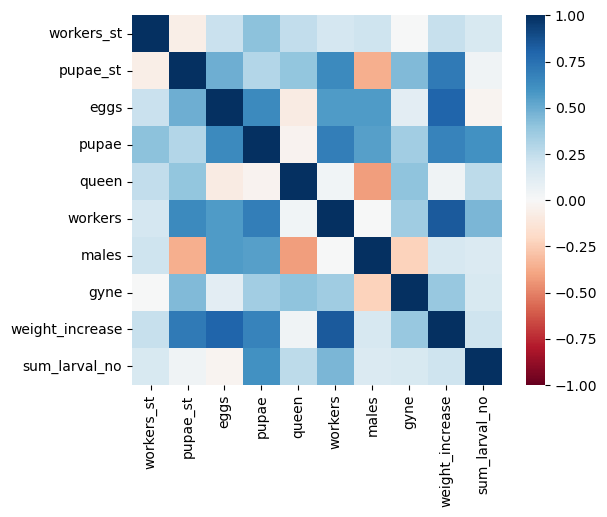

In [12]:
#Ploting the results of the control correlation using a heatmap
sns.heatmap(corr_control, vmin=-1.0, vmax=1.0, square=True, cmap="RdBu")

In [14]:
#Using the corr to have the correlation between the variables in the treatment group
corr_treatment = pesticide.corr()
corr_treatment

,workers_st,pupae_st,eggs,pupae,queen,workers,males,gyne,weight_increase,sum_larval_no
workers_st,1.000000,0.256113,0.474745,0.359907,0.378715,0.323537,-0.243564,-0.233603,-0.006073,0.373494
pupae_st,0.256113,1.000000,0.802213,0.470844,-0.337738,0.269866,-0.067470,-0.239670,0.346895,0.028649
eggs,0.474745,0.802213,1.000000,0.561860,-0.291427,0.394681,-0.048046,-0.294388,0.323429,0.161976
pupae,0.359907,0.470844,0.561860,1.000000,-0.054084,0.821387,0.399671,0.424281,0.852286,0.576144
queen,0.378715,-0.337738,-0.291427,-0.054084,1.000000,0.349021,0.053113,0.341991,-0.060645,0.575056
workers,0.323537,0.269866,0.394681,0.821387,0.349021,1.000000,0.313873,0.569250,0.782066,0.868066
males,-0.243564,-0.067470,-0.048046,0.399671,0.053113,0.313873,1.000000,0.440876,0.707300,-0.001124
gyne,-0.233603,-0.239670,-0.294388,0.424281,0.341991,0.569250,0.440876,1.000000,0.519383,0.661138
weight_increase,-0.006073,0.346895,0.323429,0.852286,-0.060645,0.782066,0.707300,0.519383,1.000000,0.432171
sum_larval_no,0.373494,0.028649,0.161976,0.576144,0.575056,0.868066,-0.001124,0.661138,0.432171,1.000000


In the treatment group, the strongest correlations are between: "pupae_st" and "eggs"; "pupae" and "workers"; "pupae" and "weight_increase"; "workers" and "weight_increase"; "workers" and "sum_larval_no"; "males" and "weight_increase"

<Axes: >

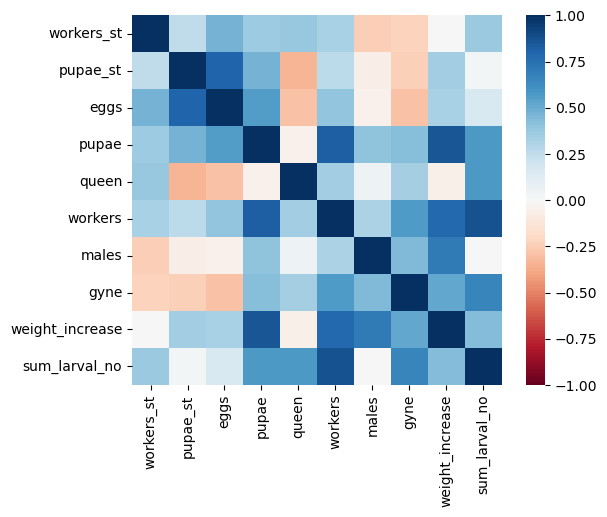

In [15]:
#Ploting the results of the treatment correlation using a heatmap
sns.heatmap(corr_treatment, vmin=-1.0, vmax=1.0, square=True, cmap="RdBu")

Analysing the normality of the data set to test the hypothesis that colonies that were treated with pesticide have a different census of bees and weight after the treatment

In [17]:
#Selecting the numeric columns in the bees data frame
numeric_columns = bees.select_dtypes(include=['int64', 'float64']).columns

normal_columns = []
non_normal_columns = []

#Applying the shapiro test for each column in the dataframe 
for column in numeric_columns:
    stat, p_value = stats.shapiro(bees[column].dropna())
    alpha = 0.05
    
#After setting the significance level, the results will be printed according to alpha 0.05    
    if p_value > alpha:
        normal_columns.append(column)
    else:
        non_normal_columns.append(column)

print("Normal columns:", normal_columns)
print("\nNon-normal columns:", non_normal_columns)

Normal columns: ['workers_st', 'pupae_st', 'eggs', 'pupae', 'workers', 'weight_increase', 'sum_larval_no']

Non-normal columns: ['queen', 'males', 'gyne']


Since some of the data are non-normal, it is possible to implement the non-parametric Mann-Whitney U test to analyze the difference between each variable versus the control and pesticide groups

In [19]:
#Creating a list of variables to analyse against the treatment/control groups using the Mann-Whitney U test
column_list=["eggs", "pupae", "queen", "workers", "males", "gyne", "weight_increase", "sum_larval_no"]

for col in column_list:
    control_group = bees[bees['treatment'] == 'c'][col]
    treatment_group = bees[bees['treatment'] == 't'][col]
    
    #Performing the Mann-Whitney U test and printing the p-value and U statistic
    u_statistic, p_value = mannwhitneyu(control_group, treatment_group, alternative='two-sided')
    
    print(f"U Statistic: {u_statistic}")
    print(f"P Value: {p_value}")

U Statistic: 55.5
P Value: 0.7053513720635047
U Statistic: 38.0
P Value: 0.3844942826161789
U Statistic: 50.0
P Value: 1.0
U Statistic: 54.5
P Value: 0.762282125586337
U Statistic: 57.5
P Value: 0.596286621572947
U Statistic: 50.5
P Value: 1.0
U Statistic: 65.0
P Value: 0.27303633975118835
U Statistic: 39.0
P Value: 0.4273553138978077


Based on the Mann-Whitney U test seems like the bees groups are not different between the control and pesticide treatments. Next, the Generalized Linear Model (GLM) can be used to investigate the relationship between the response variables and the predictors. In this case, the predictor variables are "treatment" and "b_wt_st" - the first one is the control or treated with pesticide groups, and the second one refers to the initial weight of each colony at the beginning of the experiments.

In [20]:
#1.GLM modeling of weight_increase based on treatment and initial colony weight
m1 = sm.GLM.from_formula("weight_increase ~ treatment + b_wt_st", family=sm.families.Gaussian(), data=bees_complete)
result_m1 = m1.fit()
#The Gaussian family is used for this variable because 'weight_increase' follows a Gaussian distribution, it is not count data
print(result_m1.summary())


#2.GLM modeling of egg number based on treatment and initial colony weight
m2 = sm.GLM.from_formula("eggs ~ treatment + b_wt_st", family=sm.families.Poisson(), data=bees_complete)
result_m2 = m2.fit()
#The Poisson family is used for 'eggs' because it is appropriate for count data
print(result_m2.summary())

#3.GLM modeling of larval number based on treatment and initial colony weight
m3 = sm.GLM.from_formula("sum_larval_no ~ treatment + b_wt_st", family=sm.families.Poisson(), data=bees_complete)
result_m3 = m3.fit()
#The Poisson family is used for 'larval number' because it is appropriate for count data
print(result_m3.summary())

#4.GLM modeling of pupae number based on treatment and initial colony weight
m4 = sm.GLM.from_formula("pupae ~ treatment + b_wt_st", family=sm.families.Poisson(), data=bees_complete)
result_m4 = m4.fit()
#The Poisson family is used for 'pupae' because it is appropriate for count data
print(result_m4.summary())

#5.GLM modeling of workers number based on treatment and initial colony weight
m5 = sm.GLM.from_formula("workers ~ treatment + b_wt_st", family=sm.families.Poisson(), data=bees_complete)
result_m5 = m5.fit()
#The Poisson family is used for 'workers' because it is appropriate for count data
print(result_m5.summary())

#6.GLM modeling of males number based on treatment and initial colony weight
m6 = sm.GLM.from_formula("males ~ treatment + b_wt_st", family=sm.families.Poisson(), data=bees_complete)
result_m6 = m6.fit()
#The Poisson family is used for 'males' because it is appropriate for count data
print(result_m6.summary())

#7.GLM modeling of gyne number based on treatment and initial colony weight
m7 = sm.GLM.from_formula("gyne ~ treatment + b_wt_st", family=sm.families.Poisson(), data=bees_complete)
result_m7 = m7.fit()
#The Poisson family is used for 'gyne' because it is appropriate for count data
print(result_m7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        weight_increase   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                          1967.6
Method:                          IRLS   Log-Likelihood:                -102.60
Date:                Fri, 29 Dec 2023   Deviance:                       33449.
Time:                        11:07:56   Pearson chi2:                 3.34e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2827
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.6154     53.616      0.

In general, the models were statistically sigifnicant (p<0.05), indicating that the treatment and the initial condition of each colony can be associated with the bumblebees colonies individuals (except for the treatment in the "weight_increase" and "gyne")

Since the initial weight of the colonies and the treatments seem to have a relationship with the bees groups, and the weight_increase was correlated with several variables (e.g. workers, eggs, males, pupae in the corr analysis), I wanted to perform a final analysis exploring the relationship between the final weight of the colonies and the biological variables of interest in the bees groups

Variable: eggs
R-squared Score: 0.07998575862722768


C:\Users\de23959\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


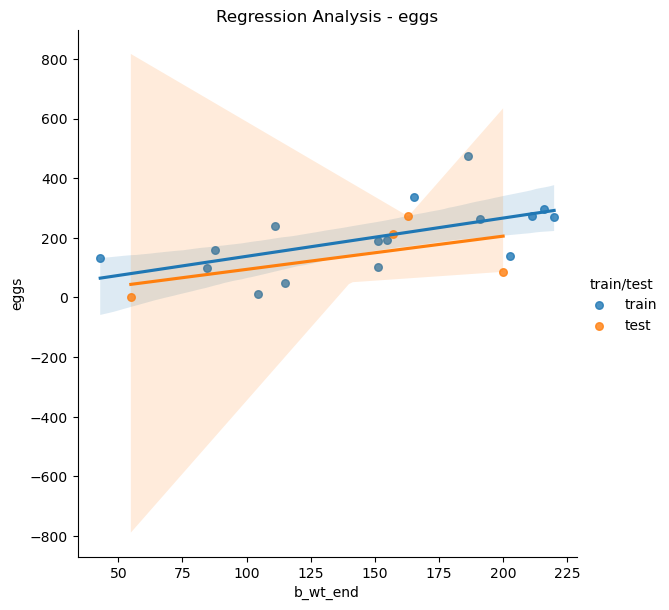

Variable: sum_larval_no
R-squared Score: 0.5849350147533381


C:\Users\de23959\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


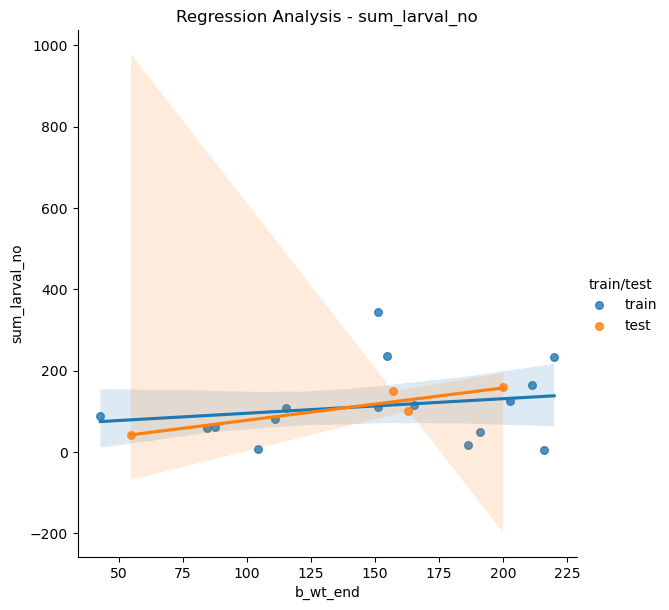

Variable: pupae
R-squared Score: 0.5509168482944811


C:\Users\de23959\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


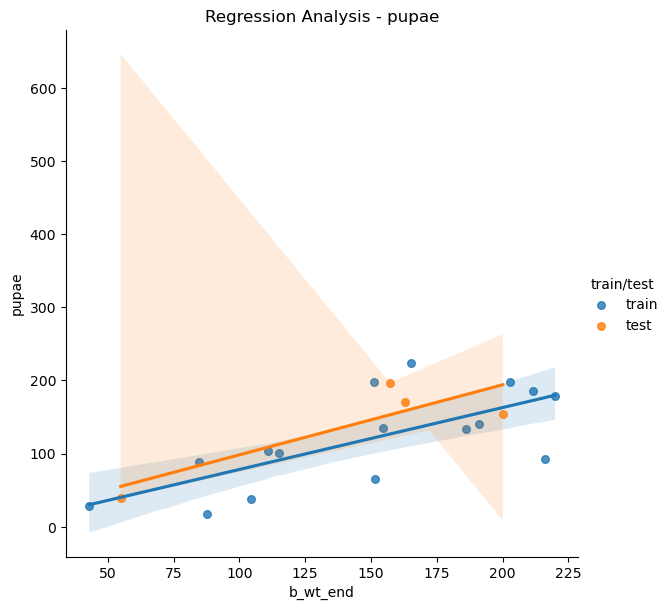

Variable: workers
R-squared Score: 0.8074302433769805


C:\Users\de23959\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


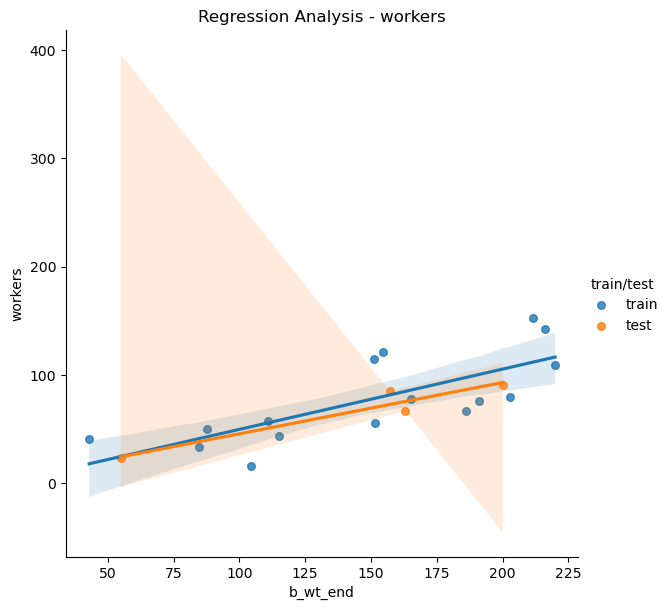

Variable: males
R-squared Score: 0.43588706679227573


C:\Users\de23959\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


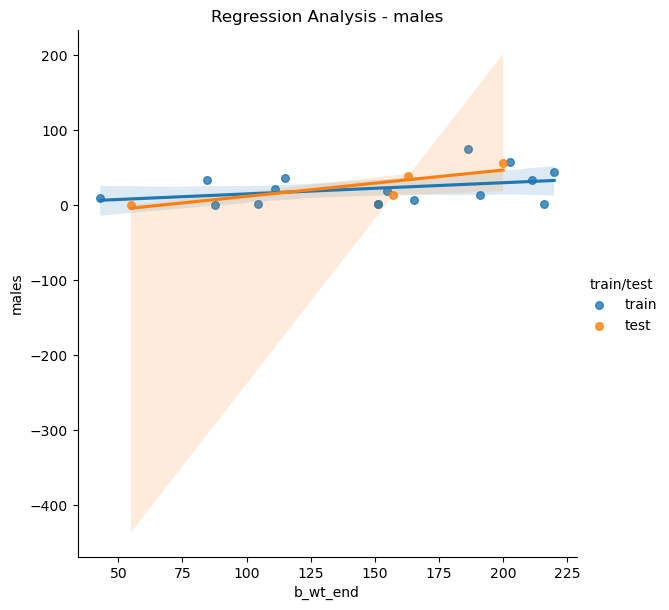

Variable: gyne
R-squared Score: -2.5196299307033443


C:\Users\de23959\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


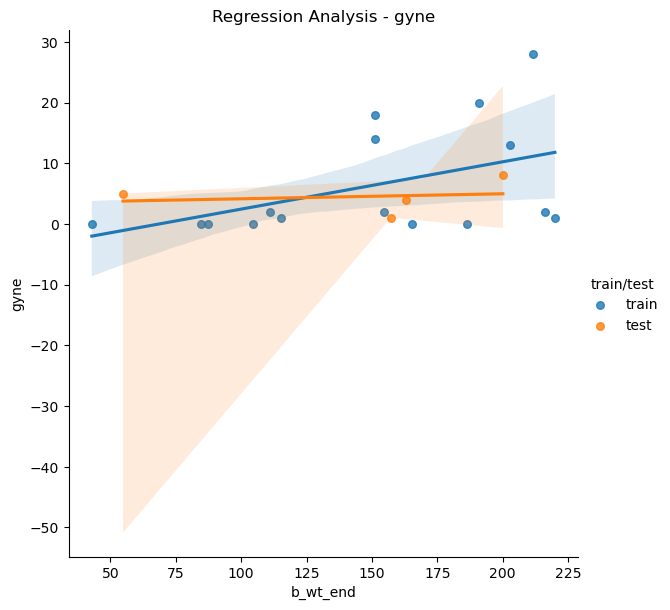

In [21]:
#Adding a new column "train/test" to the "bees_complete" data frame 
bees_complete['train/test'] = 'train'

#Introducing randomness to the model 
random_seed = int(datetime.now().timestamp())

#Split the data into training and testing sets
train_indices, test_indices = train_test_split(bees_complete.index, test_size=0.2, random_state=random_seed)
bees_complete.loc[test_indices, 'train/test'] = 'test'

#List of response variables to analyze
variables_to_analyze = ["eggs", "sum_larval_no", "pupae", "workers", "males", "gyne"]

#Loop to analyze each variable
for variable in variables_to_analyze:
    X = bees_complete[["b_wt_end"]]
    y = bees_complete[variable]

    #Split the data into training and testing sets
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=random_seed)

    #Linear regression model
    model = LinearRegression(fit_intercept=True)
    model.fit(train_X, train_y)

    #Obtaining the model score
    score = model.score(test_X, test_y)
    print(f"Variable: {variable}")
    print(f"R-squared Score: {score}")

    #Plotting
    sns.lmplot(data=bees_complete, x="b_wt_end", y=variable, hue="train/test", scatter_kws={"s": 30}, height=6)
    plt.title(f"Regression Analysis - {variable}")
    plt.show()

All of the linear regression models did not have good scores. This means that the variability is not well explained by the models, and other factors and or models can explain better the variability in the bees groups. For example, the foraging activity may be associated with the colonies weight in the end of the experiment, since the colonies may have different foraging sucess depending on their conditions and it can affect the colony weight and bees survival.